<img src='./assets/pi2_eda_header.png'>

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime
#from mpl_finance import candlestick_ohlc


Una vez descargados los archivos de datos, vamos a realizar una pequeña exploración para ver como están constituidos y que podemos describir de ellos

In [2]:
# Recordemos que los datos fueron descargados a través de la API de yfinance, con el módulo 
#pi2_analytics_etl.py
spx_data = pd.read_csv('./data/spx_data.csv', index_col='Date')


In [4]:
#visualicemos que traen los datos
spx_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [7]:
#De qué tipo son los datos?
spx_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Hasta aquí, podemos ver que el archivo contiene respecto del indicador S&P500(SPX), los siguientes valores para cada día registrado: 
Open    :   El valor con el que abre el indicador
High    :   El valor mas alto registrado en ese día
Low     :   El valor mas bajo
Close   :   El valor de cierre
Adj Close : El valor de cierre ajustado   
Volume  :   El importe del total operado en ese día

In [5]:
#ok se trata de puros datos númericos, verifiquemos si hay valores nulos. 
#Lo lógico sería que no
spx_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

No tenemos datos nulos, que era lo lógico. Empecemos a revisar la información general del dataset

In [6]:
#Tamaño del dataset
spx_data.shape

(5821, 6)

In [3]:
spx_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5824.000000,5824.000000,5824.000000,5824.000000,5824.000000,5.824000e+03
mean,1887.213548,1898.504291,1874.972197,1887.428640,1887.428640,3.302854e+09
std,977.377354,982.501233,971.786752,977.504549,977.504549,1.522671e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1184.619995,1191.787537,1177.212494,1184.485016,1184.485016,1.986412e+09
50%,1434.540039,1443.799988,1425.660034,1434.540039,1434.540039,3.409245e+09
75%,2392.387573,2398.442444,2380.992432,2390.967407,2390.967407,4.159542e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10


    La variable a la que le daremos seguimiento es Adj Close ya que representa el precio con el que cierra operaciones del indicador S&P500 en ese día en específico. Hasta este punto podemos observar hay mucha variedad en los datos pero estos no están muy dispersos, por lo que la media nos puede dar una medida precisa del comportamiento de esa variable.

/tmp/ipykernel_8740/2660146868.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spx_data['Adj Close'])


<Axes: xlabel='Adj Close', ylabel='Density'>

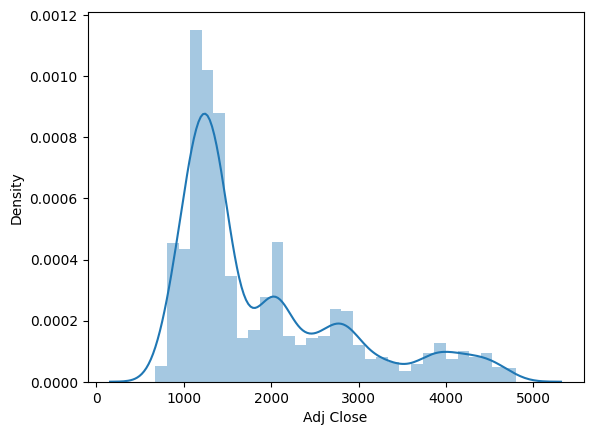

In [12]:
#vamos a ver como están distribuidos los precios
sns.distplot(spx_data['Adj Close'])

Como se trata de precios distribuidos a lo largo del tiempo, lo que esta gráfica representa es que durante mucho tiempo el precio del índice, estuvo en el rango de los 1,000 ~ 1,500 USD y posteriormente los rangos 2,000; 3,000; 4,000 han sido mas cortos. Esto se muestra mejor en una gráfica de línea de tiempo.

<Figure size 1500x1000 with 0 Axes>

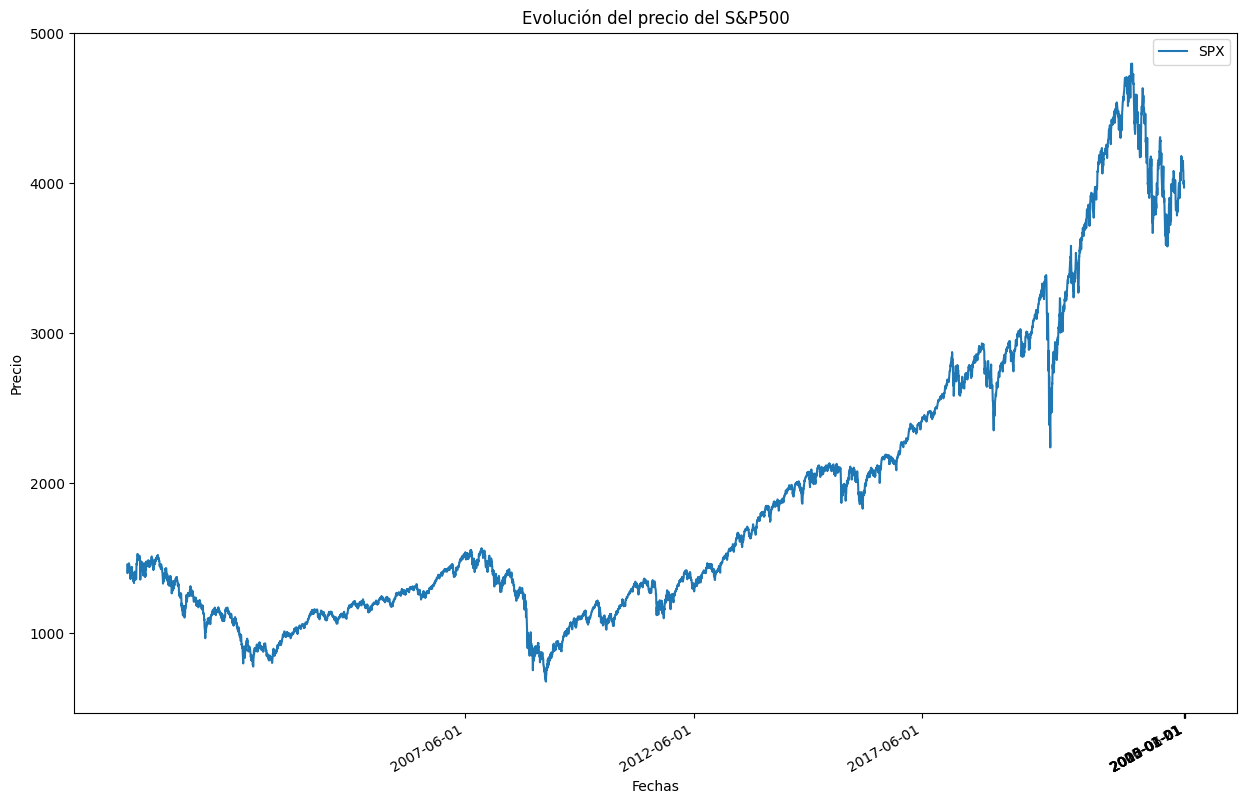

In [9]:
#Vmos a observar como se está comportando a lo largo del tiempo
lstFechas =['2000-01-01','2002-06-01','2005-01-01','2007-06-01','2010-01-01','2012-06-01','2015-01-01','2017-06-01','2023-02-21']
plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(spx_data.index, spx_data['Adj Close'],label='SPX')
ax.set_title('Evolución del precio del S&P500')
ax.set_xlabel('Fechas')
ax.set_ylabel('Precio')
ax.set_xticks(lstFechas)
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

Vamos a hacer grupos de 5 años para observar su distribución

In [3]:
spx_1 = spx_data.copy()
spx_1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2023-02-17,4077.389893,4081.510010,4047.949951,4079.090088,4079.090088,4045480000
2023-02-21,4052.350098,4052.350098,3995.189941,3997.340088,3997.340088,4121590000
2023-02-22 00:00:00,4001.830078,4017.370117,3976.899902,3991.050049,3991.050049,4079320000


In [4]:

spx_1 = spx_data[(spx_data.index >= '2000-01-01') & (spx_data.index <= '2005-12-31')]
spx_1['ciclo'] = '2000 - 2005'
spx_2 = spx_data[(spx_data.index >= '2006-01-01') & (spx_data.index <= '2010-12-31')]
spx_2['ciclo'] = '2006 - 2010'
spx_3 = spx_data[(spx_data.index >= '2011-01-01') & (spx_data.index <= '2015-12-31')]
spx_3['ciclo'] = '2011 - 2015'
spx_4 = spx_data[(spx_data.index >= '2016-01-01') & (spx_data.index <= '2020-12-31')]
spx_4['ciclo'] = '2016 - 2020'
spx_5 = spx_data[(spx_data.index >= '2021-01-01') & (spx_data.index <= '2023-12-31')]
spx_5['ciclo'] = '2021 - 2023'
spx_1 = pd.concat([spx_1,spx_2,spx_3,spx_4,spx_5], axis = 0)


/tmp/ipykernel_8205/4112197274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spx_1['ciclo'] = '2000 - 2005'
/tmp/ipykernel_8205/4112197274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spx_2['ciclo'] = '2006 - 2010'
/tmp/ipykernel_8205/4112197274.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [5]:
spx_1

,Open,High,Low,Close,Adj Close,Volume,ciclo
Date,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,2000 - 2005
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,2000 - 2005
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,2000 - 2005
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,2000 - 2005
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,2000 - 2005
...,...,...,...,...,...,...,...
2023-02-17,4077.389893,4081.510010,4047.949951,4079.090088,4079.090088,4045480000,2021 - 2023
2023-02-21,4052.350098,4052.350098,3995.189941,3997.340088,3997.340088,4121590000,2021 - 2023
2023-02-22 00:00:00,4001.830078,4017.370117,3976.899902,3991.050049,3991.050049,4079320000,2021 - 2023


In [6]:
spx_1['ciclo'].unique()

array(['2000 - 2005', '2006 - 2010', '2011 - 2015', '2016 - 2020',
       '2021 - 2023'], dtype=object)

<Axes: xlabel='ciclo', ylabel='Adj Close'>

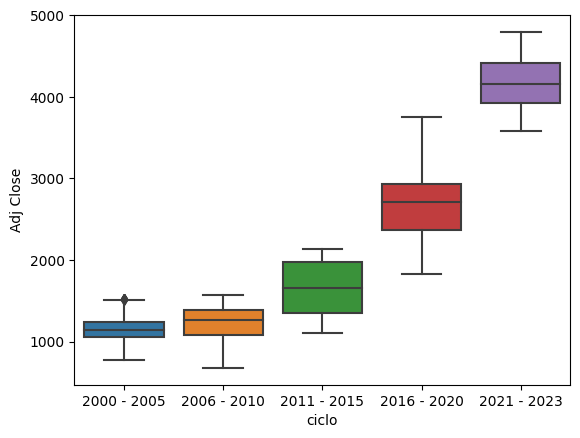

In [7]:

sns.boxplot(x='ciclo', y='Adj Close' ,data=spx_1)

La gráfica muestra la dispersión de los precios del indicador, siendo notorio el incremento desde el año 2016.

a partir de aquí hay que poner el análisis multivariado, considerando 'Close Adj' y 'Monto'